In [101]:
! pip install numpy


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
! pip install chart_studio plotly


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [104]:
import chart_studio.plotly as py

In [105]:
!pip install plotly


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [106]:
import plotly.graph_objs as go

In [107]:
from plotly.offline import plot


In [108]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot



In [109]:
init_notebook_mode(connected=True)


In [110]:
stock=pd.read_csv(r'C:\Users\indun\OneDrive\Desktop\python 3\Data Science-20231209T103625Z-001\Data Science\Minor Project\stock price.csv')
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [111]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [112]:
stock['Date'] = pd.to_datetime(stock['Date'])


In [113]:
print(f'Dataframe contains stock prices between {stock.Date.min()} {stock.Date.max()}')


Dataframe contains stock prices between 2018-02-05 00:00:00 2022-02-04 00:00:00


In [114]:
print(f'Total days = {(stock.Date.max() - stock.Date.min()).days} days')      


Total days = 1460 days


In [115]:
stock.describe()



,Date,Open,High,Low,Close,Adj Close,Volume
count,1009,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,2020-02-05 07:30:58.870168320,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
min,2018-02-05 00:00:00,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,2019-02-06 00:00:00,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,2020-02-06 00:00:00,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,2021-02-05 00:00:00,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,2022-02-04 00:00:00,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07
std,NaN,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06


<Axes: >

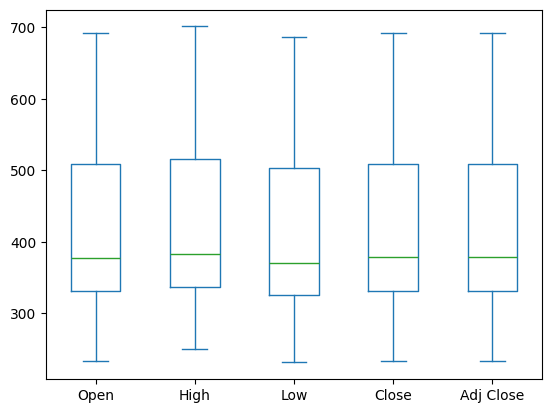

In [116]:
stock[['Open','High','Low','Close','Adj Close']].plot(kind='box')



In [117]:

layout=go.Layout(
    title='Stock Price Prediction',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)


In [118]:
stock_data= [{'x':stock['Date'],'y':stock['Close']}]


In [119]:
plot = go.Figure(data=stock_data, layout=layout)


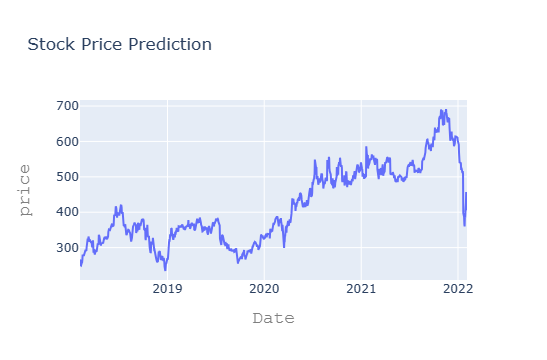

In [120]:

iplot(plot)

In [121]:
from sklearn.model_selection import train_test_split


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [ ]:
X = np.array(stock.index).reshape(-1,1)
Y = stock['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101) 


In [ ]:
scaler=StandardScaler().fit(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
lm=LinearRegression()
lm.fit(X_train, Y_train)

In [ ]:
 trace0 = go.Scatter(
     x = X_train.T[0],
     y = Y_train,
     mode = 'markers',
     name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'markers',
    name = 'predicted'
)
stock_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=stock_data, layout=layout)



In [ ]:
iplot(plot2)

In [ ]:
scores = f'''
{'metric'.ljust(10)}{'train'.center(20)}{'test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)
